# Sequence generation
> Sequence generation with Huggingface transformers and fastai

In this notebook GPT2 will be used to generate radiology report texts

In [ ]:
import transformers
from transformers import AutoTokenizer, AutoModelForCausalLM
from fastai_transformer.core import *
from fastai.text.all import *

In [ ]:
# cuda
from fastai.distributed import *

In [ ]:
pretrained_weights = 'gpt2'
tokenizer = AutoTokenizer.from_pretrained(pretrained_weights)

In [ ]:
df = pd.read_csv('test_data.csv')

In [ ]:
dls = TextDataLoaders.from_df_with_custom_tok(df, custom_tok = tokenizer, is_lm = True, bs = 8, seq_len = 512)

In [ ]:
dls.show_batch(max_n = 2)

,text,text_
0,"If you like film, don't miss this one. If you prefer action, or horror, or romance, then you'll wonder what's happening. Everyone here is stuck in a gangster film. And what happens is transcendental murder.<br /><br />There are few similar films. No doubt it will see limited release, and be hard to find. But the search will be worth it. If you want to study a mileu as a potential symbol, then this is indeed a film to study.<br /><br />You can't watch it once. If you do you'll never see what's happening. Dark City is better. Joe Vrs. The Volcano is more fun. But Mad Dog Time could convert the gangsta crowd to symbolism...or at least to think twice before shooting again.The biggest surprise in this movie was the performance of Daryl Hannah. Rather than playing the stereotypical ditzy blonde roles that she usually does she plays a street-smart,","you like film, don't miss this one. If you prefer action, or horror, or romance, then you'll wonder what's happening. Everyone here is stuck in a gangster film. And what happens is transcendental murder.<br /><br />There are few similar films. No doubt it will see limited release, and be hard to find. But the search will be worth it. If you want to study a mileu as a potential symbol, then this is indeed a film to study.<br /><br />You can't watch it once. If you do you'll never see what's happening. Dark City is better. Joe Vrs. The Volcano is more fun. But Mad Dog Time could convert the gangsta crowd to symbolism...or at least to think twice before shooting again.The biggest surprise in this movie was the performance of Daryl Hannah. Rather than playing the stereotypical ditzy blonde roles that she usually does she plays a street-smart,"
1,"adult, the next a mature man who realises he has gained everything in life apart from what he really wants. In fact we see Latham grow up in this film, when he encounters the problems of those he envies and realises that their lives are not so good, he sees that his own lot is not so bad.<br /><br />This film has fewer weak or dud scenes than many other comedies I have seen. Comedy is so much harder than any other type of drama, it either works or it doesn't and very few comedy writers get it correct every time.I particularly loved the drama scene, where the family take to reading parts written by Latham. The pleasure is in the reaction of Tom Valco (James Gandolfini) and the comments of Brian Valco (Josh Zuckerman). It is the dilemma of the greedy Tom Valco who has to bite his",", the next a mature man who realises he has gained everything in life apart from what he really wants. In fact we see Latham grow up in this film, when he encounters the problems of those he envies and realises that their lives are not so good, he sees that his own lot is not so bad.<br /><br />This film has fewer weak or dud scenes than many other comedies I have seen. Comedy is so much harder than any other type of drama, it either works or it doesn't and very few comedy writers get it correct every time.I particularly loved the drama scene, where the family take to reading parts written by Latham. The pleasure is in the reaction of Tom Valco (James Gandolfini) and the comments of Brian Valco (Josh Zuckerman). It is the dilemma of the greedy Tom Valco who has to bite his tongue,"


In [ ]:
# cuda
model = AutoModelForCausalLM.from_pretrained(pretrained_weights)
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), cbs=[DropOutput], metrics=Perplexity()).to_fp16()
learn = learn.to_parallel()

In [ ]:
# cuda
learn.validate()

(#2) [3.7248127460479736,41.46346664428711]

SuggestedLRs(lr_min=0.017378008365631102, lr_steep=0.14454397559165955)

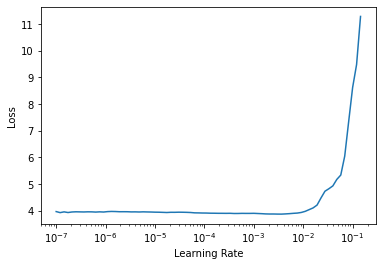

In [ ]:
# cuda
learn.lr_find()

In [ ]:
# cuda
learn.fit_one_cycle(3, 1e-4, wd=1e-4)

epoch,train_loss,valid_loss,perplexity,time
0,3.853374,3.660598,38.884571,00:13
1,3.727628,3.655627,38.691753,00:14
2,3.582776,3.670292,39.263374,00:13
3,3.471554,3.683960,39.803696,00:13
4,3.393571,3.687024,39.925835,00:13


In [ ]:
# cuda
prompt = "This movie was "

In [ ]:
# cuda
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
inp.shape

torch.Size([1, 4])

In [ ]:
# cuda
preds = learn.model.generate(inp, max_length=10, num_beams=5, temperature=14)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [ ]:
# cuda
tokenizer.decode(preds[0])

'This movie was iced up a bit too much'